### Logistic Regression

Linear vs Logistic 
Linear are best suited for contineous value but for best suited for data points like 1or0, Yes 0r No 
for this we use logistic is the most suited 

Linear regression : y=β0​+β1​X1+β2​X2+………βn​Xn 
here the β0,β1.... is the intercept 
hβ0(x) = 0(Transpose)X

#### Customer churn with Logistic Regression

This data will the prsdict the customer who is  leaving and why  the telecommunication company 

In [1]:
# !pip install scikit-learn
# !pip install matplotlib
# !pip install pandas 
# !pip install numpy 
# %matplotlib inline
# Above are the required to install 

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt

In the data set the customer who is leaving is the churn column

In [21]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv"
churn_df = pd.read_csv(url)
print("Observations:" +str(len(churn_df)))
print("Variables:" +str(len(churn_df.columns)))
churn_df.head()

Observations:200
Variables:28


,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


### Data preprocessing

In [22]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [23]:
churn_df.shape

(200, 10)

In [24]:
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [25]:
y = np.asarray(churn_df['churn'])
y [0:5]

array([1, 1, 0, 0, 0])

In [28]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.14, -0.63, -0.46,  0.48,  1.7 , -0.58, -0.86],
       [-0.12, -0.63,  0.03, -0.33, -0.64, -1.14, -0.86],
       [-0.58, -0.86, -0.26, -0.35, -1.42, -0.92, -0.86],
       [ 0.12, -0.47, -0.66,  0.01, -0.64, -0.03,  1.16],
       [-1.32, -0.47,  0.23,  0.04, -0.64,  0.53, -0.86]])

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=4)
print('Training set:',X_train.shape, y_train.shape)
print('Testing set:', X_test.shape,y_test.shape)

Training set: (160, 7) (160,)
Testing set: (40, 7) (40,)


Modeling = logistic regression with scikit-learn

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [31]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [37]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.54, 0.46],
       [0.61, 0.39],
       [0.56, 0.44],
       [0.63, 0.37],
       [0.56, 0.44],
       [0.55, 0.45],
       [0.52, 0.48],
       [0.61, 0.39],
       [0.41, 0.59],
       [0.63, 0.37],
       [0.58, 0.42],
       [0.63, 0.37],
       [0.48, 0.52],
       [0.43, 0.57],
       [0.66, 0.34],
       [0.55, 0.45],
       [0.52, 0.48],
       [0.49, 0.51],
       [0.49, 0.51],
       [0.52, 0.48],
       [0.62, 0.38],
       [0.53, 0.47],
       [0.64, 0.36],
       [0.52, 0.48],
       [0.51, 0.49],
       [0.71, 0.29],
       [0.55, 0.45],
       [0.52, 0.48],
       [0.52, 0.48],
       [0.71, 0.29],
       [0.68, 0.32],
       [0.51, 0.49],
       [0.42, 0.58],
       [0.71, 0.29],
       [0.6 , 0.4 ],
       [0.64, 0.36],
       [0.4 , 0.6 ],
       [0.52, 0.48],
       [0.66, 0.34],
       [0.51, 0.49]])

Evaluation - Jaccard index

In [32]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test,yhat,pos_label=0)

0.7058823529411765

Another way to check accuracy is the confusion matrix

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix',cmap=plt.cm.Blues):
    """ This function will print the confusion matrix normalization
    can be applied by setting the normalize = True """
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks,classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, format(cm[i,j],fmt),
                 horizontalalignment='center',
                 color = 'white' if cm[i,j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('predicted label')

print(confusion_matrix(y_test,yhat,labels=[1,0]))


[[ 6  9]
 [ 1 24]]


Confusion matrix without normalization
[[ 6  9]
 [ 1 24]]


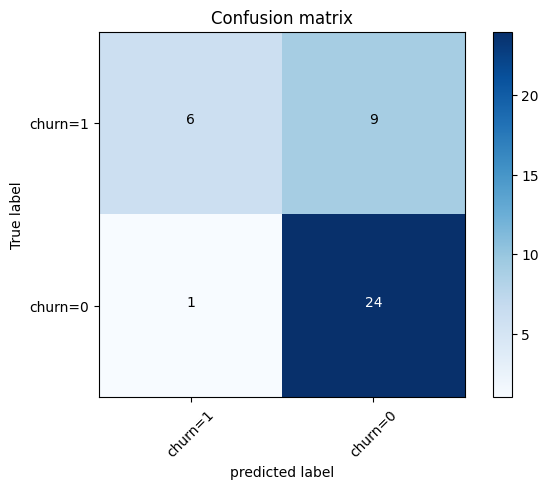

In [34]:
cnf_matrix = confusion_matrix(y_test, yhat,labels=[1,0])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize=False, title='Confusion matrix')

precision : Measure of accuracy 
recall : True positive rate , recal = TP/(TP+FN)
F1 Score : Average of precision and recall

In [19]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.67      0.96      0.79        25
           1       0.75      0.20      0.32        15

    accuracy                           0.68        40
   macro avg       0.71      0.58      0.55        40
weighted avg       0.70      0.68      0.61        40



Log loss 

In [38]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6017092478101186

As a Example now we use different classifier 

In [40]:
LR2 = LogisticRegression(C=0.01, solver = 'sag').fit(X_train,y_train)
yhat_prob2 = LR2.predict_proba(X_test)
print("Logloss: : %.2f" % log_loss(y_test, yhat_prob2))

Logloss: : 0.61
